In [1]:
import numpy as np

# create a 3d array

a = np.array([[[1, 2, 3], [4, 5, 6]],
                [[7, 8, 9], [10, 11, 12]]])

print(a)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [2]:
# reduce to 2d array

b = a.reshape(2, 6)

print(b)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


In [3]:
# reduce to 1d array

c = a.reshape(12)

print(c)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


#### Using AE to encode image representation

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2757 - val_loss: 0.1916
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1723 - val_loss: 0.1553
Epoch 3/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1456 - val_loss: 0.1341
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1285 - val_loss: 0.1209
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1180 - val_loss: 0.1126
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1110 - val_loss: 0.1069
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1061 - val_loss: 0.1028
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1024 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0998 - val_loss: 0.0974
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0979 - val_loss: 0.09

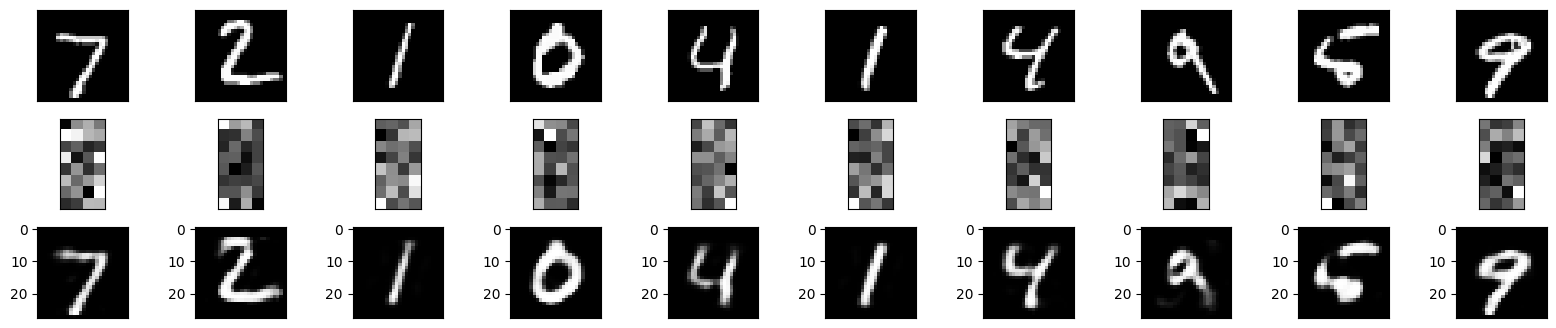

In [5]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images into a 784-dimensional vector
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the size of the encoded representation
encoding_dim = 32

# Define the input layer
input_img = Input(shape=(784,))

# Define the encoded layer
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Define the decoded layer
decoded = Dense(784, activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Define the encoder model
encoder = Model(input_img, encoded)

# Define the decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Use the encoder model to compress the images
encoded_imgs = encoder.predict(x_test)

# Use the decoder model to decompress the images
decoded_imgs = decoder.predict(encoded_imgs)

# Plot the original images, compressed images, and decompressed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Compressed image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Decompressed image
    ax = plt.subplot(3, n, i + 1 + n*2)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)

In [ ]:
class RNN:
  # ...
  def step(self, x):
    # update the hidden state
    self.h = np.tanh(np.dot(self.W_hh, self.h) + np.dot(self.W_xh, x))
    # compute the output vector
    y = np.dot(self.W_hy, self.h)
    return y